# Bees Data Challenge Progress

- [x] **1. Problem Definition**
    - [x] 1.1 Analyze the challenge document to extract specific objectives
    - [x] 1.2 Formulate a clear problem statement for each objective

- [x] **2. Data Collection**
    - [x] 2.1 Request access and download the dataset from the provided link
    - [x] 2.2 Verify the integrity and quality of the collected data

- [x] **3. Data Preprocessing**
    - [x] 3.1 Verify missing values, deciding between imputation and removal
    - [x] 3.2 Verify outliers using appropriate statistical methods
    - [x] 3.3 Normalize or scale numerical features
    - [x] 3.4 Encode categorical variables into numeric formats

- [x] **4. Exploratory Data Analysis (EDA)**
    - [x] 4.1 Visualize variable distributions and identify patterns
    - [x] 4.3 Summarize descriptive statistics for an overview of the data

- [x] **5. Model Building and Evaluation**
    - [x] 5.1 Develop a clustering model for customer segmentation
    - [x] 5.2 Construct a predictive model for inventory management
    - [x] 5.3 Analyze order patterns for optimization of order fulfillment
    - [x] 5.4 Evaluate model performance using appropriate metrics

- [x] **6. Conclusions and Insights for Business Improvement**
    - [x] 6.1 Consolidate obtained insights and propose specific actions for implementation
    - [x] 6.2 Prepare a presentation of the results for stakeholders

- [x] **7. Documentation and Submission**
    - [x] 7.1 Document the entire process in a Jupyter Notebook in detail
    - [x] 7.2 Review the notebook to ensure it is well-structured and easy to follow
    - [x] 7.3 Prepare the notebook for submission, following the provided instructions




### Problem Definition

The challenge encompasses three main areas:


1. **Customer Segmentation:**
   - **Objective:** To segment customers based on their ordering behavior, including aspects such as frequency, time of day, and days since prior order.
   - **Purpose:** This segmentation will help understand customer preferences more deeply and enable the development of optimized marketing strategies tailored to different customer segments.


2. **Inventory Management:**
   - **Objective:** To implement a predictive model that estimates inventory levels for individual products across different departments and aisles.
   - **Details:** The model should focus on predictive capabilities rather than mere forecasting, considering variables like the day of the week and hour of the day.
   - **Purpose:** The model is intended to help optimize stock levels and minimize waste by ensuring that inventory matches demand patterns as closely as possible.


3. **Order Fulfillment Optimization (Bonus Points):**
   - **Objective:** To optimize the order fulfillment process by analyzing and improving the efficiency of operations based on factors like the day of the week and time of day when most orders are placed.
   - **Purpose:** The goal is to ensure ensure timely and efficient deliveries to customers while minimizing operational costs.




### 2. **Data Collection (Restricted to Provided Data)**

Collect and work exclusively with the data provided for the challenge. Identify data sources 
within the provided dataset and ensure data quality and integrity during analysis. 

- [x] 2.1 Request access and download the dataset from the provided link
- [x] 2.2 Verify the integrity and quality of the collected data


In [1]:
import pandas as pd
import numpy as np
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aisles_df = pd.read_csv("data/online-shopping-dataset/aisles.csv")
departments_df = pd.read_csv("data/online-shopping-dataset/departments.csv")
order_products_df = pd.read_csv("data/online-shopping-dataset/order_products.csv")
orders_df = pd.read_csv("data/online-shopping-dataset/orders.csv")
products_df = pd.read_csv("data/online-shopping-dataset/products.csv")

In [3]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.head(5))

Dados de aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Dados de departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Dados de order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Dados de orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Dados de products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



# **3. Data Preprocessing**

- [x] 3.1 Filter: prior data

- [x] 3.2 Verify duplicates

- [x] 3.3 Verify missing values

The missing data corresponds to `days_since_prior_order` for customers who have not yet placed their first order.


- [x] 3.4 Verify outliers 



### **3.1 Filter: prior data**

In [4]:
orders_df = orders_df[orders_df.eval_set == "train"]
len(orders_df)

131209

### Verify duplicates

In [5]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}

# Check and print the number of duplicated rows for each DataFrame
for name, df in df_dict.items():
    # Using duplicated().sum() to count duplicate rows
    duplicated_rows = df.duplicated().sum()
    print(f'{name} has {duplicated_rows} duplicated rows.')

aisles has 0 duplicated rows.
departments has 0 duplicated rows.
order_products has 0 duplicated rows.
orders has 0 duplicated rows.
products has 0 duplicated rows.


### Verify missing values

Dados de aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Unique values


aisle_id    134
aisle       134
dtype: int64

<Axes: >

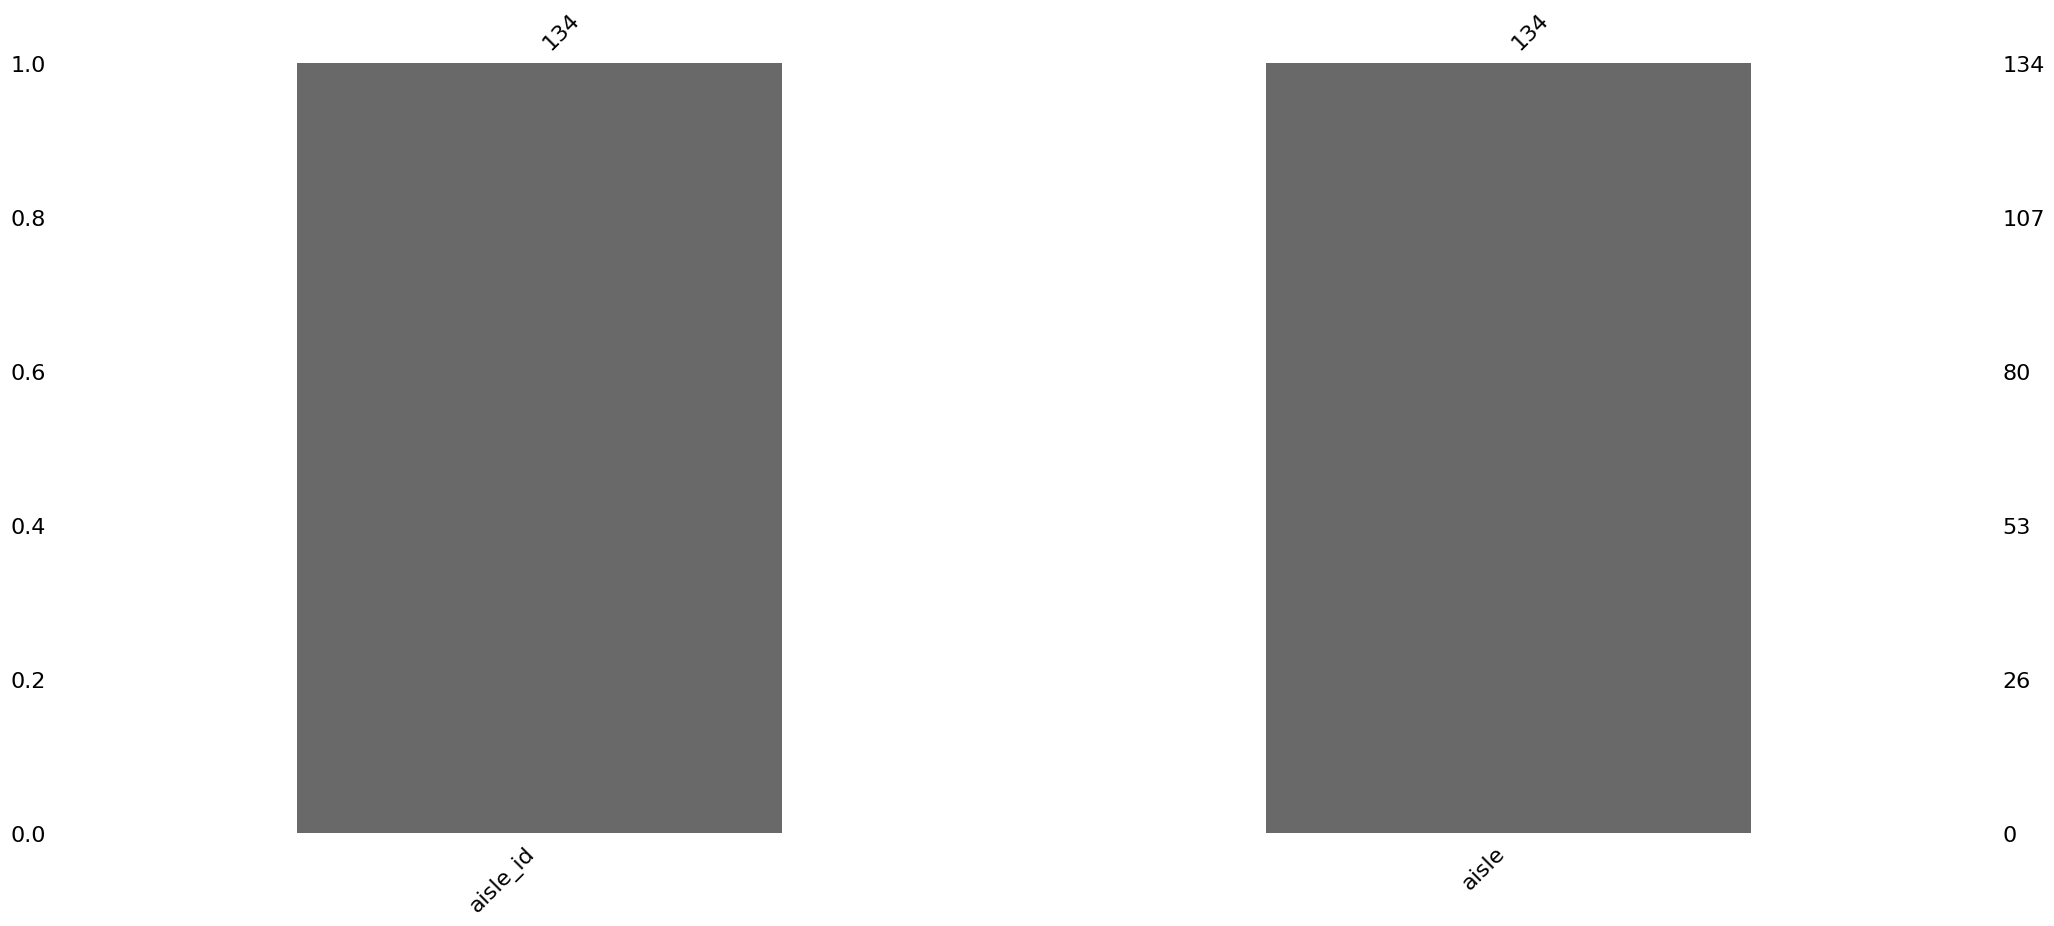

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

----------------------------------------------------------------------------------------------------
Dados de departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Unique values


department_id    21
department       21
dtype: int64

<Axes: >

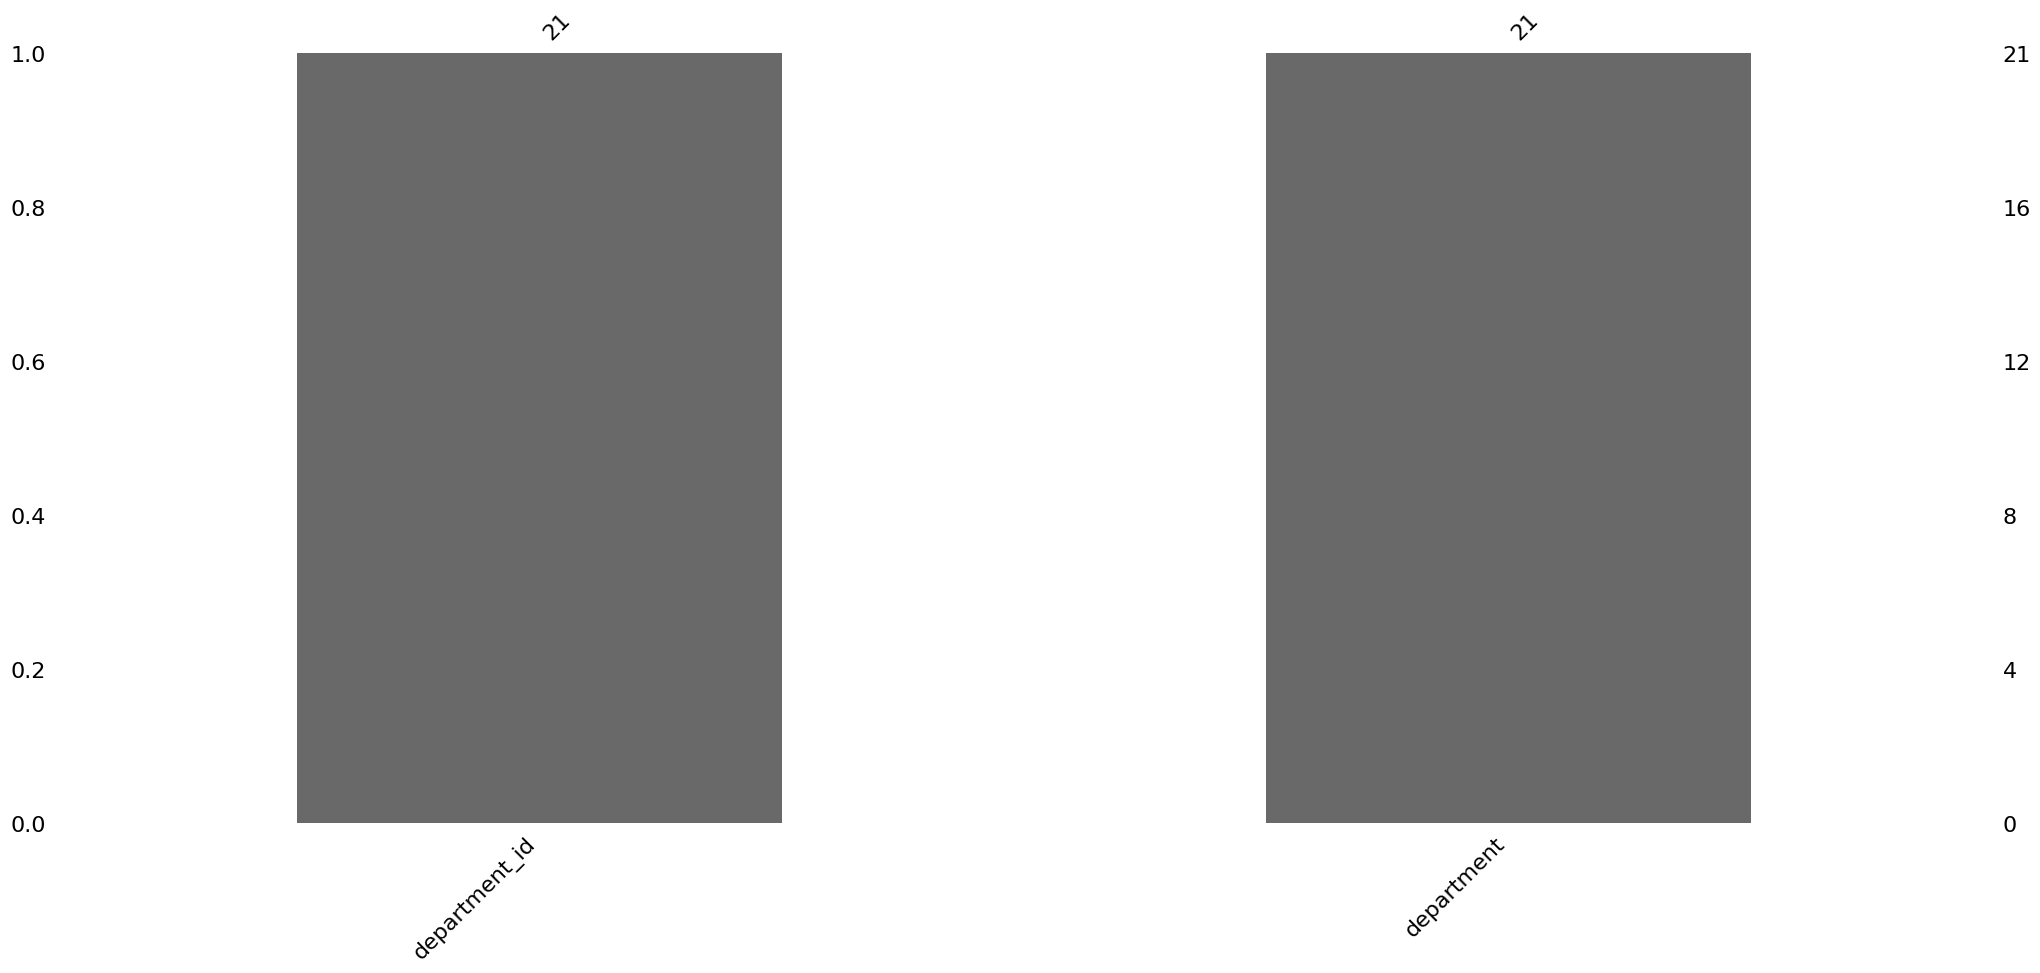

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


None

----------------------------------------------------------------------------------------------------
Dados de order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Unique values


order_id             3346083
product_id             49685
add_to_cart_order        145
reordered                  2
dtype: int64

<Axes: >

In [6]:
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.head(5))
    print("Unique values")
    display(df.nunique())
    display(mn.bar(df))
    plt.show()
    display(df.info(show_counts=True))
    print("-"*100)
    


In [ ]:
# orders details

orders_df.head()

In [ ]:
orders_df.eval_set.value_counts()

In [ ]:
order_products_df.head()

In [ ]:
products_df.head()

## Verify outliers

In [ ]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.info())

### Unique values verification

In [ ]:
order_products_df.reordered.value_counts(dropna=False)

#### orders dataset

In [ ]:
orders_df.order_number.value_counts(dropna=False).sort_index()

In [ ]:
orders_df.order_dow.value_counts(dropna=False).sort_index()

In [ ]:
orders_df.order_hour_of_day.value_counts(dropna=False).sort_index()

In [ ]:
orders_df.days_since_prior_order.value_counts(dropna=False).sort_index()

#### products

In [ ]:
products_df.head()

In [ ]:
products_df.aisle_id.unique()

In [ ]:
products_df.department_id.unique()


In [ ]:
# Function to detect and visualize outliers based on the IQR
def detect_and_plot_outliers(df, column_name):
    print(f"Outlier removing from {column_name}")
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print statistical details
    print(f"IQR = {IQR}")
    print(f"Lower Bound = {lower_bound}")
    print(f"Upper Bound = {upper_bound}")
    print(f"Min = {df[column_name].min()}")
    print(f"Max = {df[column_name].max()}")
    
    # Plot histogram
    plt.figure(figsize=(10, 3))
    plt.hist(df[column_name], bins=50, color='blue', alpha=0.7)
    plt.axvline(x=lower_bound, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=upper_bound, color='r', linestyle='dashed', linewidth=2)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Create a boolean mask where true indicates the presence of an outlier
    outliers_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    
    # Print percentage of outliers
    print(f"Outliers percentage in the dataset: {round(np.mean(outliers_mask) * 100, 2)}%")
    print("-"*100)
    # Return the dataframe without outliers
    return df[~outliers_mask]


In [ ]:
### Apply the outlier detection to order_products dataframe

In [ ]:
outliers_removed_order_products_df = detect_and_plot_outliers(order_products_df, 'add_to_cart_order')



In [ ]:
outliers_removed_orders_df = detect_and_plot_outliers(orders_df, 'days_since_prior_order')
outliers_removed_orders_df = detect_and_plot_outliers(outliers_removed_orders_df, 'order_number')

### Data merge

In [ ]:
aisles_df.aisle_id = aisles_df.aisle_id.astype('category')
aisles_df.aisle = aisles_df.aisle.astype('category')

departments_df.department_id = departments_df.department_id.astype('category')
departments_df.department = departments_df.department.astype('category')

products_df.product_id = products_df.product_id.astype('category')
products_df.product_name = products_df.product_name.astype('category')
products_df.aisle_id = products_df.aisle_id.astype('category')
products_df.department_id = products_df.department_id.astype('category')

order_products_df.order_id = order_products_df.order_id.astype('category')
order_products_df.product_id = order_products_df.product_id.astype('category')

orders_df.order_id = orders_df.order_id.astype('category')
orders_df.user_id = orders_df.user_id.astype('category')
orders_df.eval_set = orders_df.eval_set.astype('category')

In [ ]:
products_df = pd.merge(products_df, aisles_df, on='aisle_id', how='left')
products_df = pd.merge(products_df, departments_df, on='department_id', how='left')

In [ ]:
merged_df = pd.merge(order_products_df, products_df, on='product_id', how='left')

In [ ]:
len(orders_df)

In [ ]:
orders_df.head()

In [ ]:
final_df = pd.merge(merged_df, orders_df, on='order_id', how='inner')

In [ ]:
len(final_df)

# **4. Exploratory Data Analysis (EDA)**

### How many orders are for just one product?

What is the number of orders with one product and with more than one product?

How many orders are for 5 or more products?

In [ ]:
order_id_agg = final_df.groupby("order_id").agg(count = ("order_id", "count"))

In [ ]:
top_orders = order_id_agg.sort_values(by = ["count"], ascending = False)
top_orders

In [ ]:
gt_one = len(top_orders[top_orders["count"] > 1])
ge_five = len(top_orders[top_orders["count"] >= 5])
eq_one = len(top_orders[top_orders["count"] == 1])
print(f"""Ordering more than one product {gt_one} ou {round(gt_one/len(top_orders)*100, 2)}
Orders of 5 or more products {ge_five} ou {round(ge_five/len(top_orders)*100, 2)}
Order exactly one product {eq_one} ou {round(eq_one/len(top_orders)*100, 2)}""")

### Which departments sell the most?

In [ ]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.head(2))

In [ ]:
df1 = final_df.department.value_counts(ascending = False).to_frame()
df1


In [ ]:
df1["percent"] = round(df1["count"]/df1["count"].sum()*100, 1)
df1["count"] = round(df1["count"]/1000_000, 1)
df1 = df1.rename(columns={"count": "orders [M]"})
df1.reset_index(inplace= True)


In [ ]:
df1

In [ ]:
print(f"Total order: {round(len(final_df)/1000_000, 1)} M")
plt.figure(figsize=(14, 5))
sns.barplot(data = df1, x = "department", y = "percent", order=df1['department'])
plt.title("Distribution of orders between departments")
plt.xticks(rotation = 45);


This visualization is particularly useful for understanding how orders are distributed across different departments, helping businesses identify which departments are handling more orders and might need additional resources or further analysis to optimize operations.

### What are the 3 best-selling products in each department?

In [ ]:
final_df.head()

In [ ]:
final_df.info()

In [ ]:
final_df.aisle_id = final_df.aisle_id.astype('Int64')
# final_df.aisle = final_df.aisle.astype('string')

final_df.department_id = final_df.department_id.astype('Int64')
final_df.department = final_df.department.astype('object')

final_df.product_id = final_df.product_id.astype('Int64')
final_df.product_name = final_df.product_name.astype('object')
final_df.aisle_id = final_df.aisle_id.astype('Int64')
final_df.department_id = final_df.department_id.astype('Int64')

final_df.order_id = final_df.order_id.astype('Int64')
final_df.product_id = final_df.product_id.astype('Int64')

final_df.order_id = final_df.order_id.astype('Int64')
final_df.user_id = final_df.user_id.astype('Int64')
final_df.eval_set = final_df.eval_set.astype('object')

In [ ]:
aggregated_data = final_df.groupby(['department', 'product_name']).size().reset_index(name='orders').sort_values(by=['department', 'product_name'])

# Calculation of total orders by department
total_orders_by_department = aggregated_data.groupby('department')['orders'].sum().rename('total_orders')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing the list to store DataFrames of the top 3 products per department
top_3_products_list = []

# Iterating over unique departments
for department in df1.department.unique():
    # Filtering data for the current department
    dept_data = aggregated_data[aggregated_data.department == department].copy()
    
    # Converting orders to thousands ('k') using .loc[]
    dept_data.loc[:, 'orders [k]'] = round(dept_data['orders'] / 1000, 1)
    
    # Selecting the top 3 products based on order volume
    top_3_products = dept_data.nlargest(3, 'orders')
    top_3_products.loc[:, 'department'] = department  # Ensuring department column is updated for clarity
    top_3_products_list.append(top_3_products)


# Consolidating the top 3 products from all departments
all_top_3_products = pd.concat(top_3_products_list)

# Setting a custom color palette
custom_palette = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#bbffff", "#e61941"]
sns.set_palette(custom_palette)


# Visualization focusing on sales volume
plt.figure(figsize=(20, 20))
barplot = sns.barplot(data=all_top_3_products, x="orders [k]", y="product_name", hue="department", dodge=False)

# Enhancing readability
plt.title("Top 3 Products by Sales Volume in Each Department", fontsize=16)
plt.xlabel("Total Orders (Thousands)", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


### Practical Uses of the Graph

1. **Inside Each Department**:
   - **Fine-tune Your Product Line**: Spot which products might need more advertising or which ones might need to be discontinued based on their sales compared to the top sellers.
   - **Adjust Prices Thoughtfully**: Change prices based on how much customers are buying; maybe lower prices for products that aren’t selling well or consider raising prices slightly for those that are really popular.

2. **Across Different Departments**:
   - **Move Resources Where They’re Needed**: Put more marketing effort or store space into departments or products that are selling well to boost profits.
   - **Create Smart Deals**: Think about pairing up best-selling products from one area with items from another area to increase sales for both.

3. **Making Strategic Decisions**:
   - **Manage Your Stock Better**: Keep more of the top-selling products in stock so you don’t run out, and reduce the ones that aren’t selling well to cut costs.
   - **Explore New Opportunities**: If certain products are doing really well, consider offering them in new places or to different groups of people to see if they catch on there too.


In [ ]:
# Data Aggregation
aggregated_data = final_df.groupby(['department', 'product_name']).size().reset_index(name='orders')

# Calculation of Total Orders by Department
total_orders_by_department = aggregated_data.groupby('department')['orders'].sum().rename('total_orders')

# Initialization of a List to Store the DataFrames of the Top 3 Products
top_3_products_list = []

# Iteration Over Unique Departments
for department in df1.department.unique():
    # Filtering Data for the Current Department
    dept_data = aggregated_data[aggregated_data.department == department].copy()
    
    # Calculation of Sales Percentage and Conversion of Orders to Thousands ('k')
    total_orders = total_orders_by_department.loc[department]
    dept_data.loc[:, 'percentage'] = round(dept_data['orders'] / total_orders * 100, 1)  # Sales percentage of each product
    dept_data.loc[:, 'orders [k]'] = round(dept_data['orders'] / 1000, 1)  # Sales volume in thousands
    
    # Selection of the Top 3 Products by Order Volume
    top_3_products = dept_data.nlargest(3, 'orders')
    top_3_products.loc[:, 'department'] = department
    top_3_products_list.append(top_3_products)

# Consolidation of the Top 3 Products from All Departments
all_top_3_products = pd.concat(top_3_products_list)

# Definition of a Custom Color Palette with Distinct Colors
custom_palette = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#bbffff", "#e61941"]
sns.set_palette(custom_palette)

# Visualization
plt.figure(figsize=(20, 20))
barplot = sns.barplot(data=all_top_3_products, x="percentage", y="product_name", hue="department", dodge=False)

# Improving Legibility
plt.title("Top 3 Best-Selling Products in Each Department", fontsize=16)
plt.xlabel("Percentage of Total Department Sales", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()



### How This Graph Helps

1. **Understanding Product Impact**:
   - **Measure Market Share**: This graph shows what percentage of total sales in each department comes from the top three products. It tells you how important these products are to their department.
   - **Spot Key Players**: Quickly identify which products are the most influential in generating revenue within their categories.

2. **Comparing Product Performance**:
   - **Visual Comparison**: By displaying the sales percentages, you can easily see which products are doing exceptionally well and perhaps understand why certain departments are more successful than others.
   - **Focus Efforts**: This data can help decide where to focus marketing and sales efforts to maximize returns.

3. **Strategic Planning**:
   - **Promotional Strategies**: Products with a high percentage of department sales might benefit from more aggressive promotions or better placement in stores or on websites.
   - **Inventory Adjustments**: Adjust stock levels based on the percentage contributions to avoid overstocking less popular products and understocking top sellers.

This graph is essential for making informed decisions on product management, marketing campaigns, and overall sales strategies, ensuring that resources are allocated to support the products that have the most significant impact on a department’s success.

# Seasonality

### On which days does each department sell the most?

In [ ]:

# Grouping data by department and day of the week, counting sales
sales_by_department_day = final_df.groupby(['department', 'order_dow']).size().reset_index(name='sales')

# Getting a unique list of all departments
departments = sales_by_department_day['department'].unique()

# Initial setup for the plots
sns.set(style="whitegrid")  # Sets the plot style to something more visually pleasing

# Loop through each department to create a bar chart of sales by day of the week
for department in df1.department.unique():  # Correct reference to iterate correctly through departments
    # Filtering data for the current department
    dept_sales = sales_by_department_day[sales_by_department_day['department'] == department]
    
    # Creating the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='order_dow', y='sales', data=dept_sales, color='skyblue')
    plt.title(f'Sales by Day of the Week - {department}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    plt.show()


Em que horários cada departamento vende mais?

In [ ]:
# Grouping data by department and day of the week, counting sales
sales_by_department_day = final_df.groupby(['department', 'order_hour_of_day']).size().reset_index(name='sales')

# Getting a unique list of all departments
departments = sales_by_department_day['department'].unique()

# Loop through each department to create a bar chart of sales by day of the week
for department in df1.department.unique():
    # Filtering data for the current department
    dept_sales = sales_by_department_day[sales_by_department_day['department'] == department]
    
    # Creating the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(dept_sales['order_hour_of_day'], dept_sales['sales'], color='skyblue')
    plt.title(f'Sales by Day of the Week - {department}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 24))
    
    # Displaying the chart
    plt.show()


Dos produtos que corredores (aisle) mais são vendidos em cada departamento. Em quais dias da semana são mais vendidos?


In [ ]:


# Step 1: Identify the best-selling aisle in each department
best_selling_by_department = (
    final_df.groupby(['department', 'aisle'])
    .size()
    .reset_index(name='sales')
    .sort_values(by=['sales'], ascending=[False])
    .drop_duplicates(subset=['department'], keep='first')
)

# Step 2: Analyze sales distribution across the week for each best-selling aisle in departments
for index, row in best_selling_by_department.iterrows():
    department = row['department']
    aisle = row['aisle']
    
    # Filter data for the best-selling aisle in the current department
    aisle_sales_week = final_df[(final_df['department'] == department) & (final_df['aisle'] == aisle)]
    
    # Group by day of the week and count sales
    sales_by_day = aisle_sales_week.groupby('order_dow').size().reset_index(name='sales')
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.bar(sales_by_day['order_dow'], sales_by_day['sales'], color='skyblue')
    plt.title(f'{department} - Best Selling aisle Sales by Day: {aisle}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    
    plt.show()
    plt.close()  # Close the figure after displaying it


Dos produtos que mais são vendidos em cada departamento. Em quais dias da semana são mais vendidos?

In [ ]:


# Step 1: Identify the best-selling product in each department
best_selling_by_department = (
    final_df.groupby(['department', 'product_name'])
    .size()
    .reset_index(name='sales')
    .sort_values(by=['sales'], ascending=[False])
    .drop_duplicates(subset=['department'], keep='first')
)

# Step 2: Analyze sales distribution across the week for each best-selling product in departments
for index, row in best_selling_by_department.iterrows():
    department = row['department']
    product = row['product_name']
    
    # Filter data for the best-selling product in the current department
    product_sales_week = final_df[(final_df['department'] == department) & (final_df['product_name'] == product)]
    
    # Group by day of the week and count sales
    sales_by_day = product_sales_week.groupby('order_dow').size().reset_index(name='sales')
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.bar(sales_by_day['order_dow'], sales_by_day['sales'], color='skyblue')
    plt.title(f'{department} - Best Selling Product Sales by Day: {product}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    
    plt.show()
    plt.close()  # Close the figure after displaying it


Qual a quantidade de produtos únicos?

Quais os produtos que possuem o maior número de 

In [ ]:
order_products_df.head()

In [ ]:
order_products_df.product_id.nunique()

In [ ]:
final_df.head()

In [ ]:
df = final_df[["order_id", "product_name", "product_id"]].sort_values(by = ["order_id", "product_id"], ascending = [True, True])
df

In [ ]:
df_ = df.groupby(by = ["product_id", "product_name"]).agg(occurrences = ("product_id", "count")).sort_values(by = ["occurrences"], ascending = [False])
df2 = df_[df_.occurrences > 1]
df2

In [ ]:
n = 4
# top ordered products
products_ids = df2.index[:n]
products_ids
df3 = df[df.product_id.isin(products_ids)].groupby("order_id").agg(qt = ("order_id", "count"))
df3[df3.qt > 1].sort_values(by = ["qt"], ascending = [False])


In [ ]:
# Bag of Organic Bananas
df[(df.product_id == 13176)]

In [ ]:
bananas = df[(df.product_id == 13176)].order_id
bananas

In [ ]:
df[df.order_id.isin(bananas)]


### 5. **Construção e Avaliação de Modelos**
Desenvolver modelos estatísticos ou de aprendizado de máquina para abordar os três objetivos principais:



# **Segmentação de Clientes**

Empregar técnicas de clustering, como K-means, para agrupar clientes com base em comportamento de compra.


Feature Engineering

In [ ]:
# Calculating order frequency
order_frequency = final_df.groupby('user_id')['order_id'].count()

# Most common order hour
common_order_hour = final_df.groupby('user_id')['order_hour_of_day'].agg(lambda x: x.mode()[0])

# Average days since prior order
average_days_since_prior = final_df.groupby('user_id')['days_since_prior_order'].mean()


Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Dataframe for clustering
df_cluster = pd.DataFrame({
    'Order Frequency': order_frequency,
    'Most Common Order Hour': common_order_hour,
    'Average Days Since Prior Order': average_days_since_prior
})

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster.fillna(0))  # Handling NaN values

# Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
df_cluster['Cluster'] = kmeans.labels_


Analysis of segments

In [ ]:
# Calculating cluster statistics: mean and standard deviation
cluster_analysis = df_cluster.groupby('Cluster').agg({
    'Order Frequency': ['mean', 'std'],
    'Most Common Order Hour': ['mean', 'std'],
    'Average Days Since Prior Order': ['mean', 'std'],
    'Cluster': 'count'  # Counting the number of users in each cluster
})

# Renaming columns for clarity
cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]

cluster_analysis = cluster_analysis.rename(columns={'Cluster_count': 'Number of Customers'})
cluster_analysis


# Rounding off the results for a cleaner presentation
cluster_analysis = cluster_analysis.round(1)

cluster_analysis

The data provided in the DataFrame offers a detailed view of the characteristics of five customer clusters based on their order frequency, most common order hour, and average days since their last order, along with the variability of these metrics within each cluster. Here’s an analysis of the results along with some strategic recommendations:

### Cluster Analysis

#### Cluster 0
- **Behavior:** Moderate shopping frequency with an average of 8.3 orders, predominantly in the late afternoon (5 PM).
- **Purchase Interval:** High, with an average of nearly 28 days between orders.
- **Cohesion:** Moderate variability in order frequency and low in order hour, indicating some consistency in shopping habits.
- **Recommendation:** As this cluster tends to shop monthly, targeted marketing strategies at the end of each month or monthly deals could be effective.

#### Cluster 1
- **Behavior:** Similar to Cluster 0 in terms of frequency, but prefers morning shopping (10 AM).
- **Purchase Interval:** Low, averaging about 8 days.
- **Cohesion:** Similar variability to Cluster 0, indicating a consistent weekly shopping pattern.
- **Recommendation:** Focus on weekly promotions or loyalty programs that reward weekly frequency.

#### Cluster 2
- **Behavior:** Frequent shopping with an average of 26.1 orders, usually after midday.
- **Purchase Interval:** Medium, around 17 days.
- **Cohesion:** Greater variation in days between orders, suggesting variability in shopping patterns.
- **Recommendation:** Offering flexibility and diversity in products, given the variable purchasing behavior. Incentive programs for regular purchases could help standardize shopping behavior.

#### Cluster 3
- **Behavior:** Similar to Cluster 0 in terms of frequency and interval between purchases, with a preference for morning shopping.
- **Cohesion:** High consistency, similar to Clusters 0 and 1.
- **Recommendation:** Marketing focused at the start of each month, potentially targeting popular or seasonal products that align with monthly needs.

#### Cluster 4
- **Behavior:** Slightly more active than Clusters 0 and 3, with frequent shopping and preference for late afternoon.
- **Purchase Interval:** Very short, averaging less than 8 days.
- **Cohesion:** Similar to other clusters in terms of variation.
- **Recommendation:** This cluster could be ideal for flash promotions or short-term deals, leveraging their tendency for frequent shopping.

### General Recommendations
- **Personalization:** Each cluster exhibits distinct preferences for timing and frequency of shopping, suggesting that personalized marketing strategies, such as targeted emails or deals at specific times, could be effective.
- **Loyalty Programs:** Clusters with weekly or bi-weekly frequency (Clusters 1, 2, and 4) might particularly benefit from loyalty programs that encourage maintaining this shopping habit.

### Conclusion
Utilizing this information to tailor marketing strategies can not only increase the effectiveness of campaigns but also enhance customer satisfaction by offering promotions and products that better meet their shopping needs and habits.

# **Gestão de Inventário**


Construir um modelo preditivo, como regressão ou florestas aleatórias, para prever níveis de estoque necessários, considerando variáveis como dia da semana e hora.


In [ ]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.info())

# **Otimização do Cumprimento de Pedidos**

Analisar padrões de pedidos para sugerir melhorias operacionais, potencialmente utilizando algoritmos de otimização.

Para cada modelo, avaliar o desempenho usando métricas apropriadas, como precisão, recall, ou coeficiente de silhueta para segmentação.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assume that 'final_df' is already prepared with the necessary columns:
# 'product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day', and 'add_to_cart_order' as the target variable

# Prepare the data by ensuring all categorical variables are converted to numerical codes for modeling
final_df['order_dow'] = final_df['order_dow'].astype('category').cat.codes
final_df['order_hour_of_day'] = final_df['order_hour_of_day'].astype('category').cat.codes
final_df['product_id'] = final_df['product_id'].astype('category').cat.codes
final_df['aisle_id'] = final_df['aisle_id'].astype('category').cat.codes
final_df['department_id'] = final_df['department_id'].astype('category').cat.codes

# Here, we use 'add_to_cart_order' as a proxy for inventory levels if direct inventory data isn't available
# This reflects the quantity of product interest or demand per transaction
X = final_df[['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']]
y = final_df['add_to_cart_order']  # This assumes that order frequency might reflect demand

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:

# Model - Using Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:

# Predictions on the test set
predictions = model.predict(X_test)


In [ ]:

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


In [ ]:

# Include the predictions in the dataframe for review
final_df['predicted_demand'] = model.predict(X)


In [ ]:
len(final_df)

In [ ]:
final_df.predicted_demand.sum()

In [ ]:

# Output the final DataFrame with predictions for review or use in inventory planning
final_df[['product_id', 'department_id', 'aisle_id', 'order_dow', 'order_hour_of_day', 'predicted_demand']] \
    .sort_values(by = ['product_id', 'department_id', 'aisle_id',  'order_dow', 'order_hour_of_day']).head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


descriptive_stats = final_df['add_to_cart_order'].describe()
descriptive_stats


In [ ]:

# Histograma para visualizar a distribuição
plt.figure(figsize=(10, 6))
plt.hist(final_df['add_to_cart_order'], bins=30, color='blue', alpha=0.7)
plt.title('Distribuição de Add to Cart Order')
plt.xlabel('Quantidade adicionada ao carrinho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Calcular adicionalmente a mediana para entender melhor a distribuição
median_value = final_df['add_to_cart_order'].median()
print(f"Mediana de Add to Cart Order: {median_value}")


In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Suponha que 'final_df' já esteja preparado com as colunas necessárias:
# 'product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day', 'quantity'

# Configurando 'quantity' assumindo que cada linha representa uma unidade vendida
final_df['quantity'] = 1  


final_df['product_id'] = final_df['product_id'].astype('category')
final_df['aisle_id'] = final_df['aisle_id'].astype('category')
final_df['department_id'] = final_df['department_id'].astype('category')
final_df['order_dow'] = final_df['order_dow'].astype('category')
final_df['order_hour_of_day'] = final_df['order_hour_of_day'].astype('category')


# Agregar dados para refletir a demanda total por produto
product_demand = final_df.groupby(['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']) \
    .agg(total_quantity=('quantity', 'sum')).reset_index()

# Convertendo características categóricas para o tipo 'category' adequado ao LightGBM
for col in ['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']:
    product_demand[col] = product_demand[col].astype('category')

# Separar as características e a variável alvo para modelagem
X = product_demand[['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']]
y = product_demand['total_quantity']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:

# Configurar o LGBMRegressor
lgbm = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)


In [ ]:
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mae', early_stopping_rounds=10)

# Predições com o modelo otimizado
predictions = lgbm.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with LGBM: {mae}')

# Criar DataFrame para exibir previsões junto com as características
predictions_df = X_test.copy()
predictions_df['predicted_total_quantity'] = predictions
predictions_df = predictions_df.sort_values(by=['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day'])
print(predictions_df.head())



### 6. **Conclusões e Insights para Melhoria do Negócio**
Consolidar os insights obtidos a partir da análise e modelagem, propondo ações específicas para a ABInBev implementar, visando melhorias nas estratégias de marketing, eficiência do inventário e processos de entrega.



### 7. **Documentação e Submissão**
Documentar meticulosamente todo o processo no Jupyter Notebook, desde a coleta de dados até os insights finais. Preparar o notebook para submissão, garantindo que esteja bem estruturado e fácil de seguir, com código, visualizações e comentários claros.

Este roteiro detalha o processo de análise de dados de maneira objetiva, alinhando-se com as práticas esperadas de um cientista de dados sênior, proporcionando uma base sólida para abordar o desafio proposto pela ABInBev de forma eficaz e científica.